# 02.04 - Data Correlation
In this section, we visualize the correlation between the independent and target variables

In [14]:
# import requiered libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Read raw train data
train = pd.read_csv( '../../data/raw/train.csv' , index_col = 0 )
train.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [16]:
# Read the 'all_train.csv' file, to get a table of time resolution
all_train = pd.read_csv( '../../data/interim/all_train.csv' ,  parse_dates = [0] ,  index_col = 0 )
display( all_train.head() )

time_res = all_train[['p_num','initial_resolution']].drop_duplicates()
time_res_d = dict( zip( time_res.p_num , time_res.initial_resolution ) )
# pprint( time_res_d )

#Add the time resolution to the raw data
train['initial_resolution'] = train['p_num'].map( time_res_d )

# NOTE: some entries in activity are really the same category. For example 'Walk' & 'Walking'
# Here, we convert those cases to the same category
conv_d = {
    'Walking':'Walk',
    'Running':'Run',
    'Weights':'Strength training'

}

all_train['activity'] = all_train['activity'].replace( conv_d )

,p_num,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00,initial_resolution
2020-01-01 00:15:00,p01,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 00:20:00,p01,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 00:25:00,p01,9.6,0.0083,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 00:30:00,p01,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN,15min
2020-01-01 00:35:00,p01,NaN,0.0083,NaN,NaN,NaN,NaN,NaN,NaN,15min


## Global correlations between all lag features ( and target variable ) in the raw data

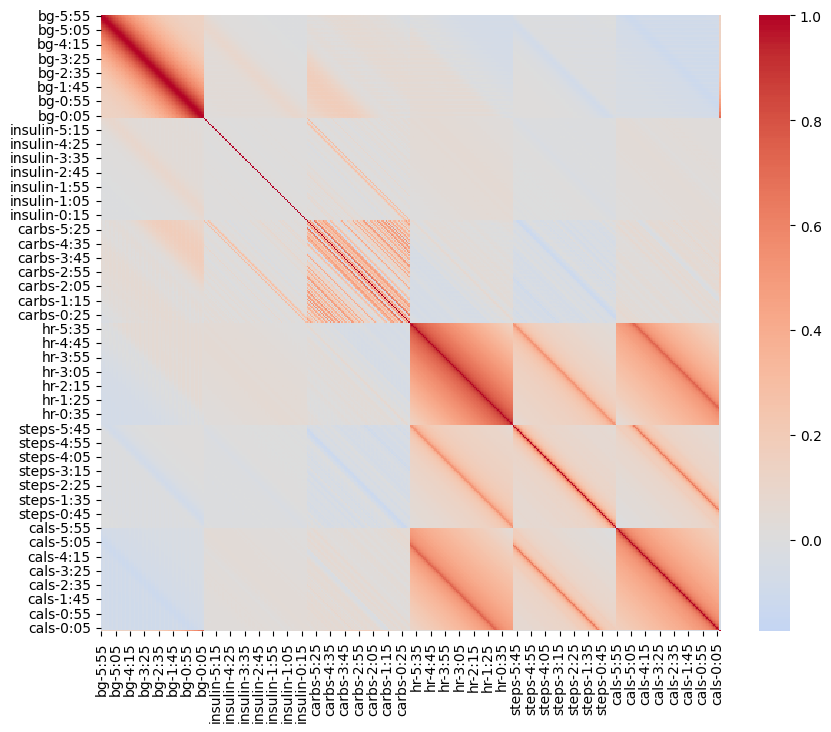

In [17]:
plt.figure( figsize=(10,8) )
corr_df = train.select_dtypes( include = np.number ).corr()
sns.heatmap( corr_df , center = 0 , cmap = "coolwarm" );

## Highlight of the correlation of **bg+1:00** against all feature/columns in the raw data

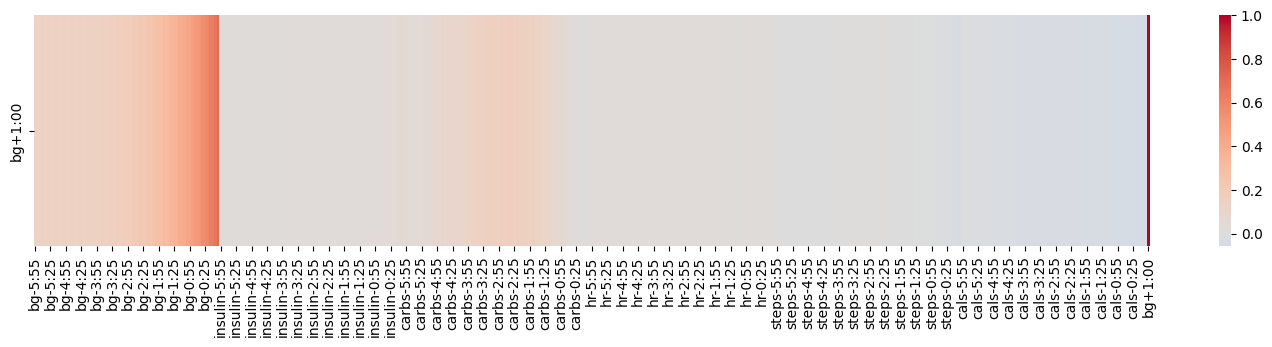

In [18]:
plt.figure( figsize=(18,3) )
sns.heatmap( pd.DataFrame( corr_df.loc[:,'bg+1:00'] ).T , center = 0 , cmap = "coolwarm" );

## Cumulative distribution of lag feature correlations to **bg+1:00**

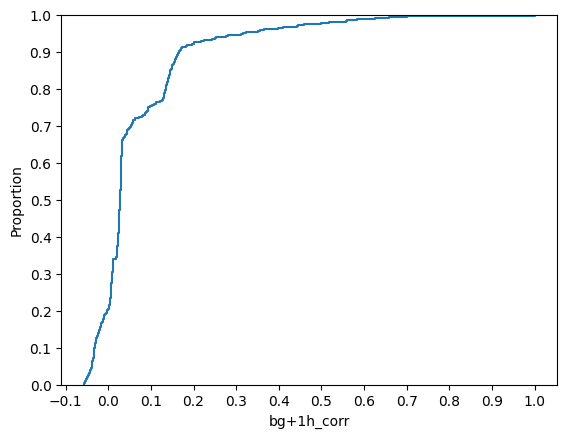

In [19]:
# Extract the pearson r coefficients
bg_plus_1_corr = pd.DataFrame( corr_df.loc[:,'bg+1:00'] ).sort_values( 'bg+1:00' , ascending = False ).reset_index()
bg_plus_1_corr.columns = ['column','bg+1h_corr']
bg_plus_1_corr[['metric','time']] = bg_plus_1_corr['column'].str.split('-',expand=True)
bg_plus_1_corr.groupby('metric').agg({'bg+1h_corr':np.mean})

# Plot the ECDF
sns.ecdfplot(data=bg_plus_1_corr, x="bg+1h_corr")
plt.xticks( np.arange(-0.1,1.01,.1) )
plt.yticks( np.arange(0,1.01,.1) );

## Examples of high-, mid- and low- correlataed features to bg+1:00
Here we would normally generate a scatterplot. But given the large number of points, we plot here the overal density of points . The red line in the plots is the regression line of least-squares

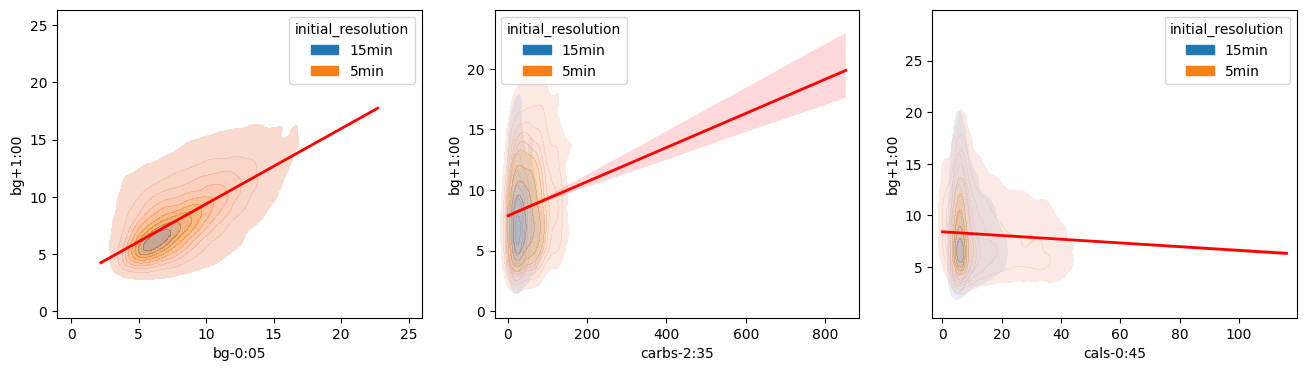

In [20]:
fig,ax = plt.subplots(1,3,figsize=(16,4))
ax = ax.flatten()

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'bg-0:05' , hue = 'initial_resolution' , fill = True , alpha = .5, ax = ax[0] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'bg-0:05' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[0] )

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'carbs-2:35' , hue = 'initial_resolution' , fill = True , alpha = .3 , ax = ax[1] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'carbs-2:35' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[1] )

sns.kdeplot( data = train , y = 'bg+1:00' , x = 'cals-0:45' , hue = 'initial_resolution' , fill = True , alpha = .3 , ax = ax[2] )
sns.regplot( data = train , y = 'bg+1:00' , x = 'cals-0:45' , scatter = False , color = 'red' , line_kws={'linewidth': 2} , ax = ax[2] );

## Correlation between all numeric variables expressed as a single time series (parsed / re-formated data)

<Figure size 300x300 with 0 Axes>

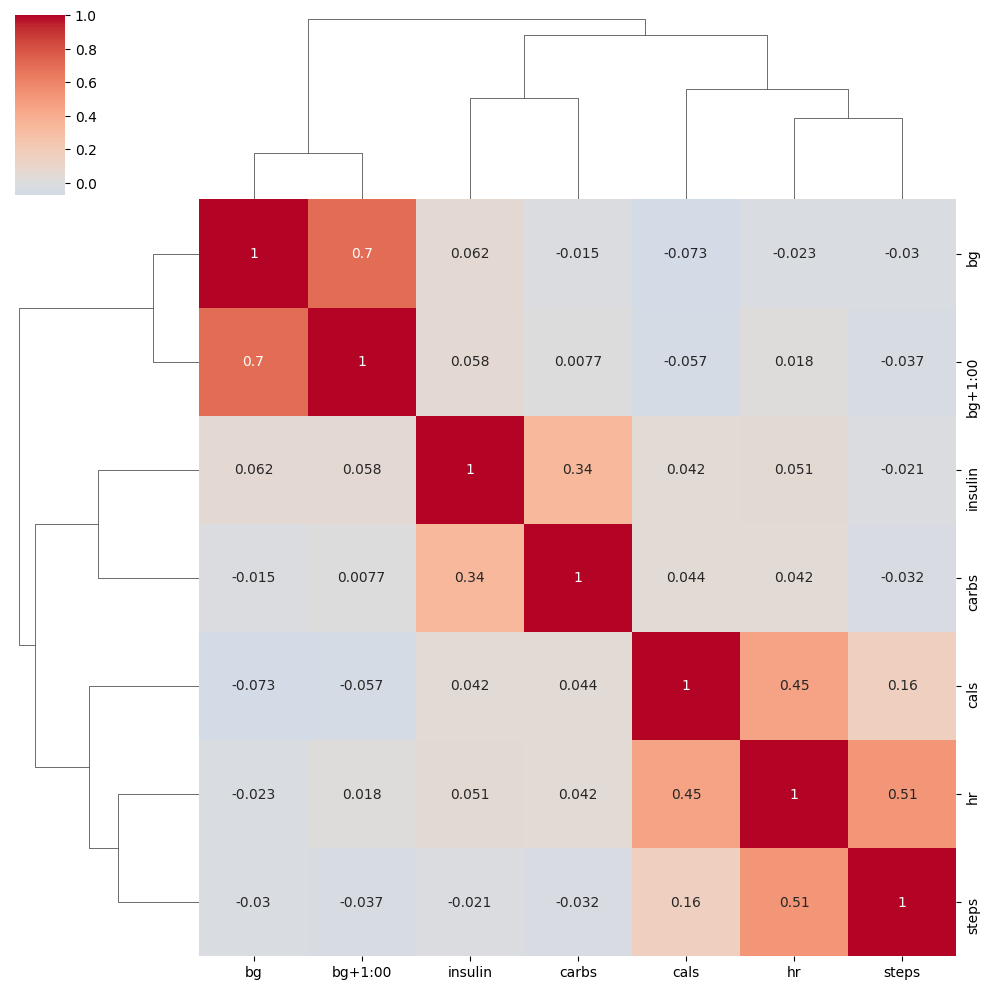

In [21]:
plt.figure( figsize=(3,3) )
sns.clustermap( 
    all_train[['bg','insulin','carbs','hr','steps','cals','bg+1:00']].corr() , 
    center = 0 , 
    cmap = "coolwarm" , 
    annot = True 
    );

## Summary
* Most features ( whole time series or lag features ) are poorly correlated to **bg+1:00**
* Correlation amongst other variablea are also observed. For example between carbohydrates consumed ( **carbs** ) and insulin delivered by the insuline pump (**insulin**)